In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load and Split Data**

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
import seaborn as sns
import matplotlib.pyplot as plt


# Display first few rows of data to understand structure
print(data.head())


# Load data
file_path = '/content/drive/MyDrive/SML Dataset/Premier League matches.csv'
data = pd.read_csv(file_path)

# Select features and target
features = data[['opponent', 'venue', 'captain', 'referee', 'formation', 'xg', 'xga', 'poss', 'sh', 'sot', 'dist']]
target = data['result']  # Assuming 'result' is the target variable

# Encode categorical columns
label_encoder = LabelEncoder()
features['opponent'] = label_encoder.fit_transform(features['opponent'])
features['venue'] = label_encoder.fit_transform(features['venue'])
features['captain'] = label_encoder.fit_transform(features['captain'])
features['referee'] = label_encoder.fit_transform(features['referee'])
features['formation'] = label_encoder.fit_transform(features['formation'])
target = label_encoder.fit_transform(target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean') # or strategy='median', 'most_frequent'

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

   Unnamed: 0        date           time            comp        round  day  \
0           0  2020-09-21  20:15 (21:15)  Premier League  Matchweek 2  Mon   
1           2  2020-09-27  16:30 (17:30)  Premier League  Matchweek 3  Sun   
2           4  2020-10-03  17:30 (18:30)  Premier League  Matchweek 4  Sat   
3           5  2020-10-17  17:30 (18:30)  Premier League  Matchweek 5  Sat   
4           7  2020-10-24  12:30 (13:30)  Premier League  Matchweek 6  Sat   

  venue result  gf  ga  ...  match report  notes  sh  sot  dist fk pk pkatt  \
0  Away      W   3   1  ...  Match Report    NaN  13    8  21.1  2  1     1   
1  Home      L   2   5  ...  Match Report    NaN  16    5  19.8  1  0     0   
2  Away      D   1   1  ...  Match Report    NaN  23    1  18.2  1  0     0   
3  Home      W   1   0  ...  Match Report    NaN  13    5  17.7  0  0     0   
4  Away      D   1   1  ...  Match Report    NaN  14    7  20.9  1  0     0   

  season             team  
0   2024  Manchester City  


<ipython-input-25-2a7c098f03ec>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['opponent'] = label_encoder.fit_transform(features['opponent'])
<ipython-input-25-2a7c098f03ec>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['venue'] = label_encoder.fit_transform(features['venue'])
<ipython-input-25-2a7c098f03ec>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

**SVM**

--- Support Vector Machine (SVM) ---
Accuracy: 0.6409185803757829
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.11      0.16       185
           1       0.64      0.75      0.69       354
           2       0.69      0.78      0.73       419

    accuracy                           0.64       958
   macro avg       0.55      0.55      0.53       958
weighted avg       0.60      0.64      0.61       958



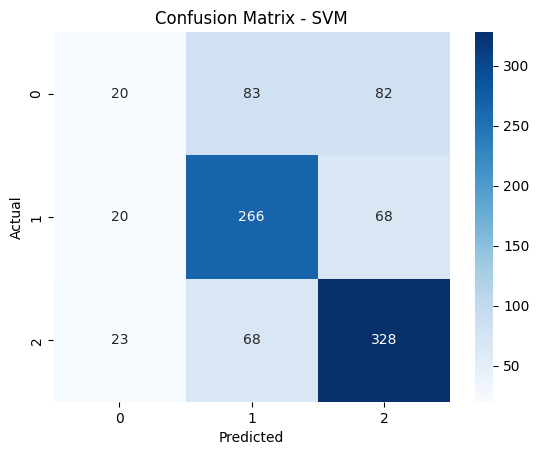

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict and evaluate SVM model
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("--- Support Vector Machine (SVM) ---")
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**KNN**

--- K-Nearest Neighbors (KNN) ---
Accuracy: 0.558455114822547
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.42      0.35       185
           1       0.59      0.56      0.58       354
           2       0.71      0.61      0.66       419

    accuracy                           0.56       958
   macro avg       0.53      0.53      0.53       958
weighted avg       0.59      0.56      0.57       958



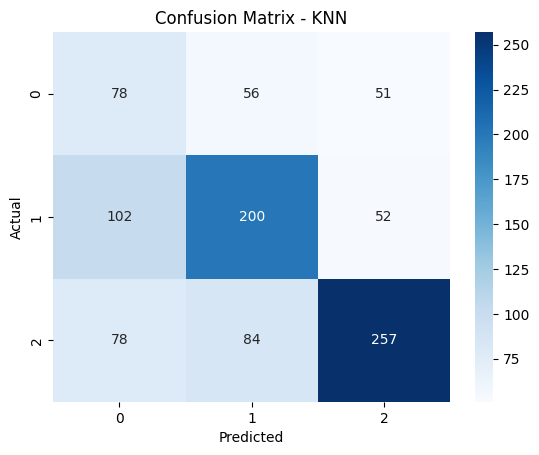

In [27]:
# Initialize and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict and evaluate KNN model
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("--- K-Nearest Neighbors (KNN) ---")
print("Accuracy:", accuracy_knn)
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Decision Tree**

--- Decision Tree ---
Accuracy: 0.662839248434238
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.50      0.45       185
           1       0.68      0.67      0.68       354
           2       0.80      0.73      0.76       419

    accuracy                           0.66       958
   macro avg       0.63      0.63      0.63       958
weighted avg       0.68      0.66      0.67       958



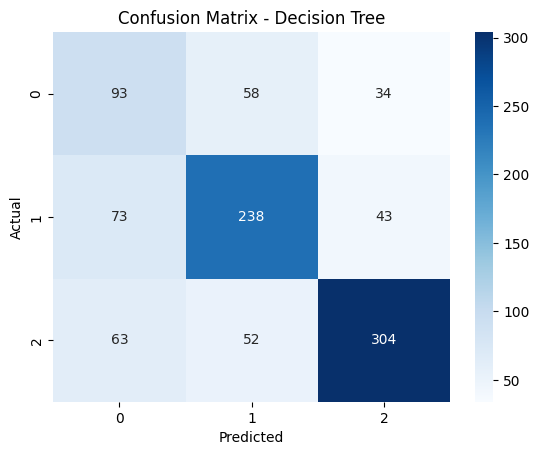

In [28]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict and evaluate Decision Tree model
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("--- Decision Tree ---")
print("Accuracy:", accuracy_dt)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Logistic Regression**

--- Logistic Regression ---
Accuracy: 0.6482254697286013
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.10      0.16       185
           1       0.63      0.75      0.68       354
           2       0.69      0.80      0.74       419

    accuracy                           0.65       958
   macro avg       0.57      0.55      0.53       958
weighted avg       0.61      0.65      0.61       958



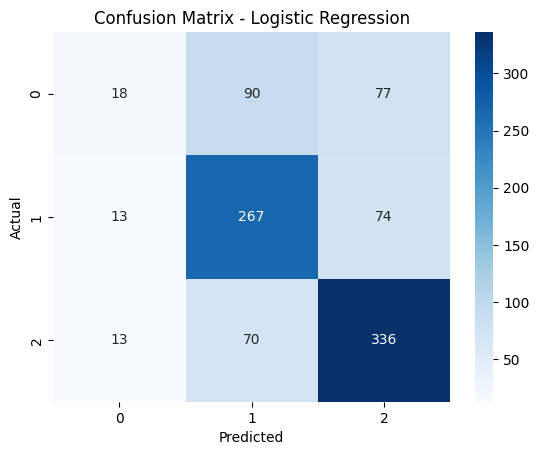

In [29]:
# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict and evaluate Logistic Regression model
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("--- Logistic Regression ---")
print("Accuracy:", accuracy_lr)
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Linear Classifier**

--- Linear Classifier (SGD) ---
Accuracy: 0.6346555323590815
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.02      0.03       185
           1       0.61      0.75      0.67       354
           2       0.68      0.81      0.74       419

    accuracy                           0.63       958
   macro avg       0.48      0.53      0.48       958
weighted avg       0.55      0.63      0.58       958



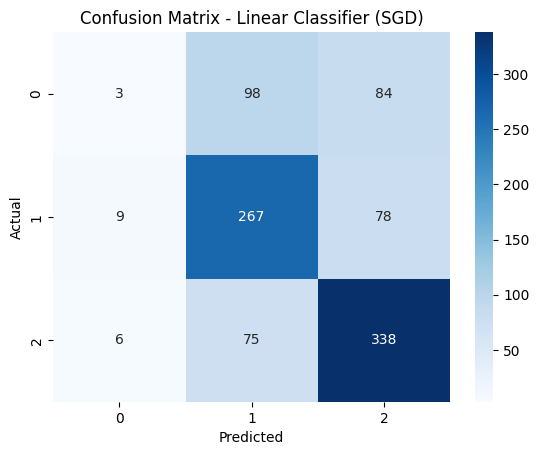

In [30]:
# Initialize and train the Linear Classifier
linear_model = SGDClassifier(loss='hinge', max_iter=1000, random_state=42)
linear_model.fit(X_train, y_train)

# Predict and evaluate Linear Classifier model
y_pred_linear = linear_model.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("--- Linear Classifier (SGD) ---")
print("Accuracy:", accuracy_linear)
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

# Confusion Matrix
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(conf_matrix_linear, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Linear Classifier (SGD)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Accuracy Comparison and Final Output**

In [31]:
# Compare accuracies
accuracies = {
    "SVM": accuracy_svm,
    "KNN": accuracy_knn,
    "Decision Tree": accuracy_dt,
    "Logistic Regression": accuracy_lr,
    "Linear Classifier": accuracy_linear
}

best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

print(f"The best model for this dataset is {best_model} with an accuracy of {best_accuracy:.2f}")


The best model for this dataset is Decision Tree with an accuracy of 0.66
